In [30]:
#import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants as spc
import scipy.integrate as spi
%matplotlib inline

In [31]:
#set default mu1 (Sun), mu2 (Jupiter)
G =  39.8#in AU^3/(1 solar mass*years^2)
mu_1 = G*1.
mu_2 = G*0.0009543
mu1_ = mu_1/(mu_1+mu_2)
mu2_ = mu_2/(mu_1+mu_2)

#define functions for r1, r2, udot, vdot, and position function
def r1(x,y,z=0,mu2=mu_2):
    return np.sqrt((x+mu2)**2 + y**2 + z**2)

def r2(x,y,z=0,mu1=mu_1):
    return np.sqrt((x-mu1)**2 + y**2 + z**2)

def udot(x,y,v,mu1=mu1_,mu2=mu2_):
    u_dot = -(mu1*((x+mu2)/(r1(x,y))**3)) - (mu2*((x-mu1)/(r2(x,y))**3)) + x + (2*v)
    return u_dot

def vdot(x,y,u,v,mu1=mu1_,mu2=mu2_):
    v_dot = -((mu1*y)/(r1(x,y))**3) - ((mu2*y)/(r2(x,y))**3) + y -(2*u)
    return v_dot

def pos(posit,t):
    x0,y0,u0,v0 = posit
    x1 = x0 + (u0*t)+(0.5*udot(x0,y0,u0,v0)*t**2)
    y1 = y0 + (v0*t) +(0.5*vdot(x0,y0,u0,v0)*t**2)
    u1 = u0 + (udot(x0,y0,u0,v0))*t
    v1 = v0 + (vdot(x0,y0,u0,v0))*t
    return [x1,y1,u1,v1]

In [32]:
#define arrays of initial conditions
x0 = np.array([-0.51,-0.52,-0.52,-0.51,-0.53])
y0 = np.array([0.88,0.91,0.92,0.88,0.92])
u0 = np.array([0.026,0.65,0.078,-0.026,0.078])
v0 = np.array([0.015,0.037,0.043,-0.015,0.043])
x=[x0[0]]
y=[y0[0]]
u=[u0[0]]
v=[v0[0]]

#define time over which integration will happen
time = np.linspace(0,1000,num=1000)

for i in range(len(time)):
    new_pos = pos([x[i],y[i],u[i],v[i]],time[i])
    x.append(new_pos[0])
    y.append(new_pos[1])
    u.append(new_pos[2])
    v.append(new_pos[3])


/home/tkonchady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/home/tkonchady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/home/tkonchady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/tkonchady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/home/tkonchady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/home/tkonchady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/home/tkonchady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWar

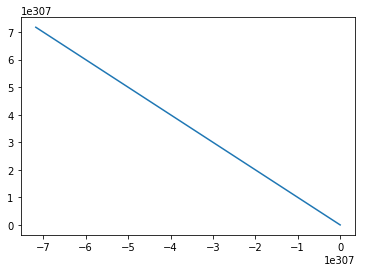

In [27]:
plt.plot(x,y)